<a href="https://colab.research.google.com/github/Meenakshi-152/AQ_Delhi/blob/main/DELHI_PM_2.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Visualisation of Pollution Levels Across Stations in Delhi over a month (19th October 2024- 19th November 2024)


The data is the PM_2.5 values of all the stations recorded over a month. The following information was collected from the [Central Pollution Control Board](https://cpcb.nic.in/) site.

Air Pollution is affected by a number of parameters( PM_2.5, PM_10, NO, etc). In the following file, visualization is done only for the parameter PM_2.5. The initial data comprised of the affects of all the parameters for each station. But the data for PM_2.5 is extracted and structured in a table, where rows represent dates and columns represent stations. Further Then the xlsx file is converted to the csv file for the further process.



Start by importing all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from matplotlib.animation import FuncAnimation
import seaborn as sns

Load the extracted csv file here.

In [2]:
# Load data
file_path = "AQnew.csv"  # Update with the correct path to your CSV file
data = pd.read_csv(file_path)

Load the colours.

In [3]:
warm_colors = [
    '#FF6347', '#FF4500', '#FF8C00', '#FFD700', '#FF1493', '#FF69B4',
    '#FF7F50', '#FF6347', '#FF4500', '#FF8C00', '#FF6347', '#FF4500',
    '#FFD700', '#FF1493', '#FF69B4', '#FF7F50', '#FF6347', '#FF4500',
    '#FF8C00', '#FFD700', '#FF1493', '#FF69B4', '#FF7F50', '#FF6347',
    '#FF4500', '#FF8C00', '#FFD700', '#FF1493', '#FF69B4', '#FF7F50',
    '#FF6347', '#FF4500', '#FF8C00', '#FFD700', '#FF1493', '#FF69B4',
    '#FF7F50', '#FF6347', '#FF4500'
]

Checking the form of the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0    From Date                          32 non-null     object 
 1    To Date                            32 non-null     object 
 2   Alipur                              32 non-null     float64
 3   Anand Vihar                         32 non-null     float64
 4   Ashok Vihar                         32 non-null     float64
 5   Aya Nagar                           32 non-null     float64
 6   Bawana                              32 non-null     float64
 7   Burari Crossing                     32 non-null     float64
 8   CRRI Mathura Road                   31 non-null     float64
 9   Chandni Chowk                       0 non-null      float64
 10  DTU                                 32 non-null     float64
 11  Dr. Karni Singh Shooting Range      32 non-null

Observe that there is no data for the station Chandni Chowk. So, drop it in the further analysis.

Understanding the data.

In [5]:
data.describe()

,Alipur,Anand Vihar,Ashok Vihar,Aya Nagar,Bawana,Burari Crossing,CRRI Mathura Road,Chandni Chowk,DTU,Dr. Karni Singh Shooting Range,...,Pusa,Pusa.1,R K Puram,Rohini,Shadipur,Sirifort,Sonia Vihar,Sri Aurobindo Marg,Vivek Vihar,Wazirpur
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,31.000000,0.0,32.000000,32.000000,...,32.00000,31.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,253.390938,291.488750,281.90625,209.831250,284.379687,246.802188,216.910000,NaN,131.058437,232.907500,...,202.84875,198.995161,257.178125,278.261250,224.173750,224.019375,266.276562,155.037812,289.586875,289.655000
std,126.375045,139.272154,140.83067,99.843831,128.012763,98.185644,108.356515,NaN,53.760883,119.365694,...,112.89169,107.194582,132.602625,125.766595,116.667509,119.803991,128.582144,103.716573,149.062611,142.646634
min,141.880000,160.440000,130.61000,92.660000,144.220000,146.210000,104.750000,NaN,66.300000,116.520000,...,89.58000,101.800000,98.380000,140.120000,90.610000,109.390000,133.710000,82.800000,141.420000,112.750000
25%,182.572500,206.842500,196.06000,146.752500,208.567500,191.132500,152.385000,NaN,97.597500,155.747500,...,132.06000,136.365000,184.282500,199.920000,145.647500,149.005000,194.295000,102.040000,215.045000,212.925000
50%,219.475000,245.745000,242.42000,179.610000,253.355000,216.200000,179.070000,NaN,119.070000,202.810000,...,168.48000,177.670000,222.440000,252.770000,206.415000,190.535000,227.810000,125.655000,240.790000,256.935000
75%,249.130000,317.260000,311.57250,216.960000,290.385000,260.732500,215.025000,NaN,150.620000,248.737500,...,207.12000,202.095000,257.067500,296.177500,248.737500,231.242500,260.987500,141.052500,300.767500,313.940000
max,665.000000,725.000000,677.10000,555.190000,701.000000,552.120000,517.960000,NaN,306.910000,620.700000,...,574.20000,619.050000,725.860000,668.000000,587.160000,637.650000,664.000000,542.080000,795.000000,729.000000


The 'From Date' column will contain datetime objects, and any invalid dates will be replaced with NaT. Removes rows with invalid or missing dates.

In [6]:
data = data.drop(columns=['Chandni Chowk'])

In [7]:
# Parse dates and filter data for October (Month = 10)
data['From Date'] = pd.to_datetime(data[' From Date'], errors='coerce')
data_filtered = data.dropna(subset=['From Date'])

<ipython-input-7-5dff12f75245>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['From Date'] = pd.to_datetime(data[' From Date'], errors='coerce')


In [8]:
data_filtered.columns

Index([' From Date', ' To Date', 'Alipur', 'Anand Vihar', 'Ashok Vihar',
       'Aya Nagar', 'Bawana', 'Burari Crossing', 'CRRI Mathura Road', 'DTU',
       'Dr. Karni Singh Shooting Range', 'Dwarka-Sector 8', 'IGI Airport (T3)',
       'IHBAS  Dilshad Garden', 'ITO', 'Jahangirpuri',
       'Jawaharlal Nehru Stadium', 'Lodhi Road', 'Lodhi Road IMD',
       'Major Dhyan Chand National Stadium', 'Mandir Marg', 'Mundka',
       'NSIT Dwarka', 'Najafgarh', 'Narela', 'Nehru Nagar', 'North Campus  DU',
       'Okhla Phase-2', 'Patparganj', 'Punjabi Bagh', 'Pusa', 'Pusa.1',
       'R K Puram', 'Rohini', 'Shadipur', 'Sirifort', 'Sonia Vihar',
       'Sri Aurobindo Marg', 'Vivek Vihar', 'Wazirpur', 'From Date'],
      dtype='object')

In [9]:
# Correcting the station columns (exclude 'From Date')
station_column = [col for col in data_filtered.columns if col != "From Date"]
# Update the list by removing 'From Date' and 'To Date'
station_column = [col for col in station_column if col not in [' From Date', ' To Date']]


In [10]:
# Prepare data for animation
frames_data = data_filtered[station_column].apply(pd.to_numeric, errors='coerce').fillna(0)

In [11]:
# Convert the first row to a proper list of values
initial_values = frames_data.iloc[0].values.tolist()

In [12]:
# Debugging checks
print("Station Column:", station_column)
print("Initial Values (First Row):", initial_values)
print("Frames Data Columns:", frames_data.columns)
print("Frames Data Index:", frames_data.index)

# Ensure lengths match
assert len(station_column) == len(initial_values), "Mismatch between station columns and initial values."


Station Column: ['Alipur', 'Anand Vihar', 'Ashok Vihar', 'Aya Nagar', 'Bawana', 'Burari Crossing', 'CRRI Mathura Road', 'DTU', 'Dr. Karni Singh Shooting Range', 'Dwarka-Sector 8', 'IGI Airport (T3)', 'IHBAS  Dilshad Garden', 'ITO', 'Jahangirpuri', 'Jawaharlal Nehru Stadium', 'Lodhi Road', 'Lodhi Road IMD', 'Major Dhyan Chand National Stadium', 'Mandir Marg', 'Mundka', 'NSIT Dwarka', 'Najafgarh', 'Narela', 'Nehru Nagar', 'North Campus  DU', 'Okhla Phase-2', 'Patparganj', 'Punjabi Bagh', 'Pusa', 'Pusa.1', 'R K Puram', 'Rohini', 'Shadipur', 'Sirifort', 'Sonia Vihar', 'Sri Aurobindo Marg', 'Vivek Vihar', 'Wazirpur']
Initial Values (First Row): [175.62, 192.8, 130.61, 92.66, 158.55, 154.28, 0.0, 80.8, 147.92, 132.58, 118.62, 99.84, 115.16, 166.25, 91.71, 0.0, 91.35, 125.69, 116.04, 157.25, 104.81, 81.14, 170.78, 132.25, 116.9, 139.95, 128.42, 138.29, 89.58, 101.8, 123.92, 141.92, 102.12, 113.98, 140.0, 89.56, 169.76, 112.75]
Frames Data Columns: Index(['Alipur', 'Anand Vihar', 'Ashok Vihar'

Make the initial plot and then animate over it.

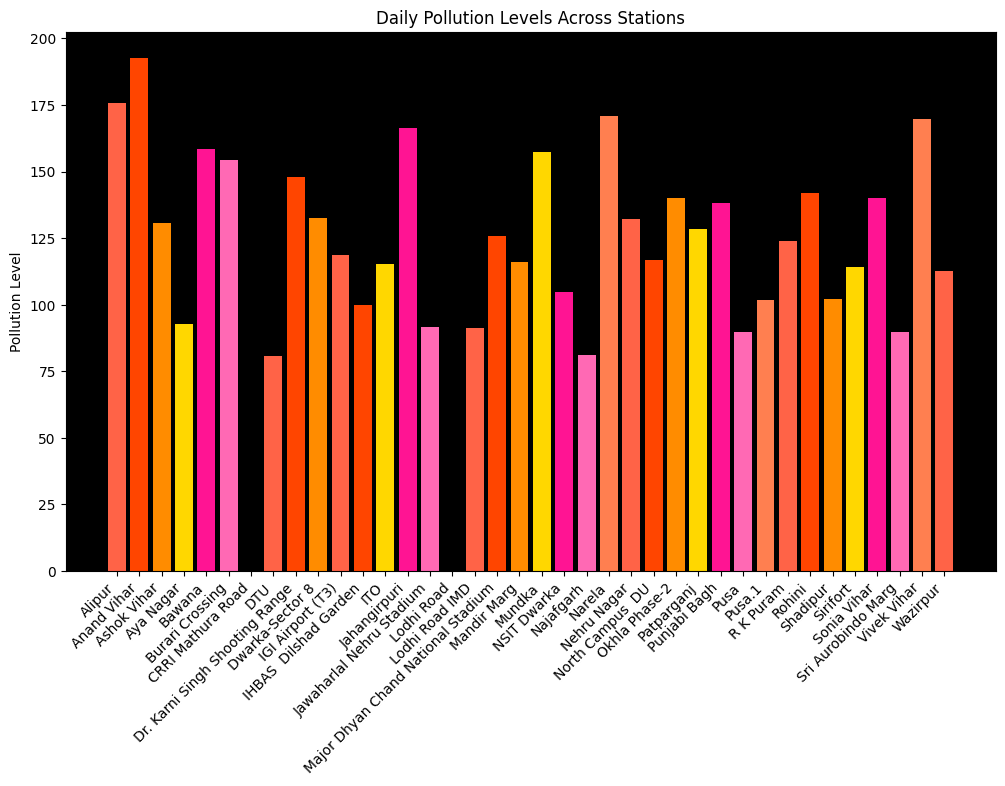

In [13]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 7))
bar_container = ax.bar(station_column, initial_values, color=warm_colors[:len(station_column)])
# Set labels and title
ax.set_ylabel("Pollution Level")
ax.set_title("Daily Pollution Levels Across Stations")
ax.set_xticks(range(len(station_column)))
ax.set_xticklabels(station_column, rotation=45, ha="right")

ax.set_facecolor('black')

Put the range of the y-axis to 1000.

In [14]:
# Set y-axis limits
ax.set_ylim(0, 1000)  # Set the y-axis range till to 1000

(0.0, 1000.0)

Making frames for each day, for that construct a function.

In [15]:
# Function to update the plot for each day
def update(frame):
    updated_values = frames_data[station_column].iloc[frame].values
    for bar, height in zip(bar_container, updated_values):
        bar.set_height(height)  # Update bar heights
    day = frames_data.index[frame]  # Get the current frame's date or index
    ax.set_title(f"Pollution Levels - Day {day}")


Animate over the frame for gif.

In [16]:
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(frames_data), interval=500, repeat=True)

In [17]:
# Save the animation as a GIF
output_gif_path = "pollution_daily_animation_fixed.gif"
ani.save(output_gif_path, writer="imagemagick")

In [18]:
print(f"Animation saved to {output_gif_path}")

Animation saved to pollution_daily_animation_fixed.gif


##Constructing a heatmap for the given data.

Converting the From Date in the datetime format.

In [19]:
data_filtered['From Date'] = pd.to_datetime(data_filtered['From Date'], errors='coerce')

<ipython-input-19-e961abe52193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['From Date'] = pd.to_datetime(data_filtered['From Date'], errors='coerce')


Reshape the data into a format suitable for a heatmap (stations as rows, dates as columns)

In [20]:
heatmap_data = data_filtered.set_index('From Date')[station_column].transpose()

Putting 0 in the place of missing values.

In [21]:
# Make sure to fill any missing values with a placeholder (optional)
heatmap_data = heatmap_data.fillna(0)

Processing the plot.

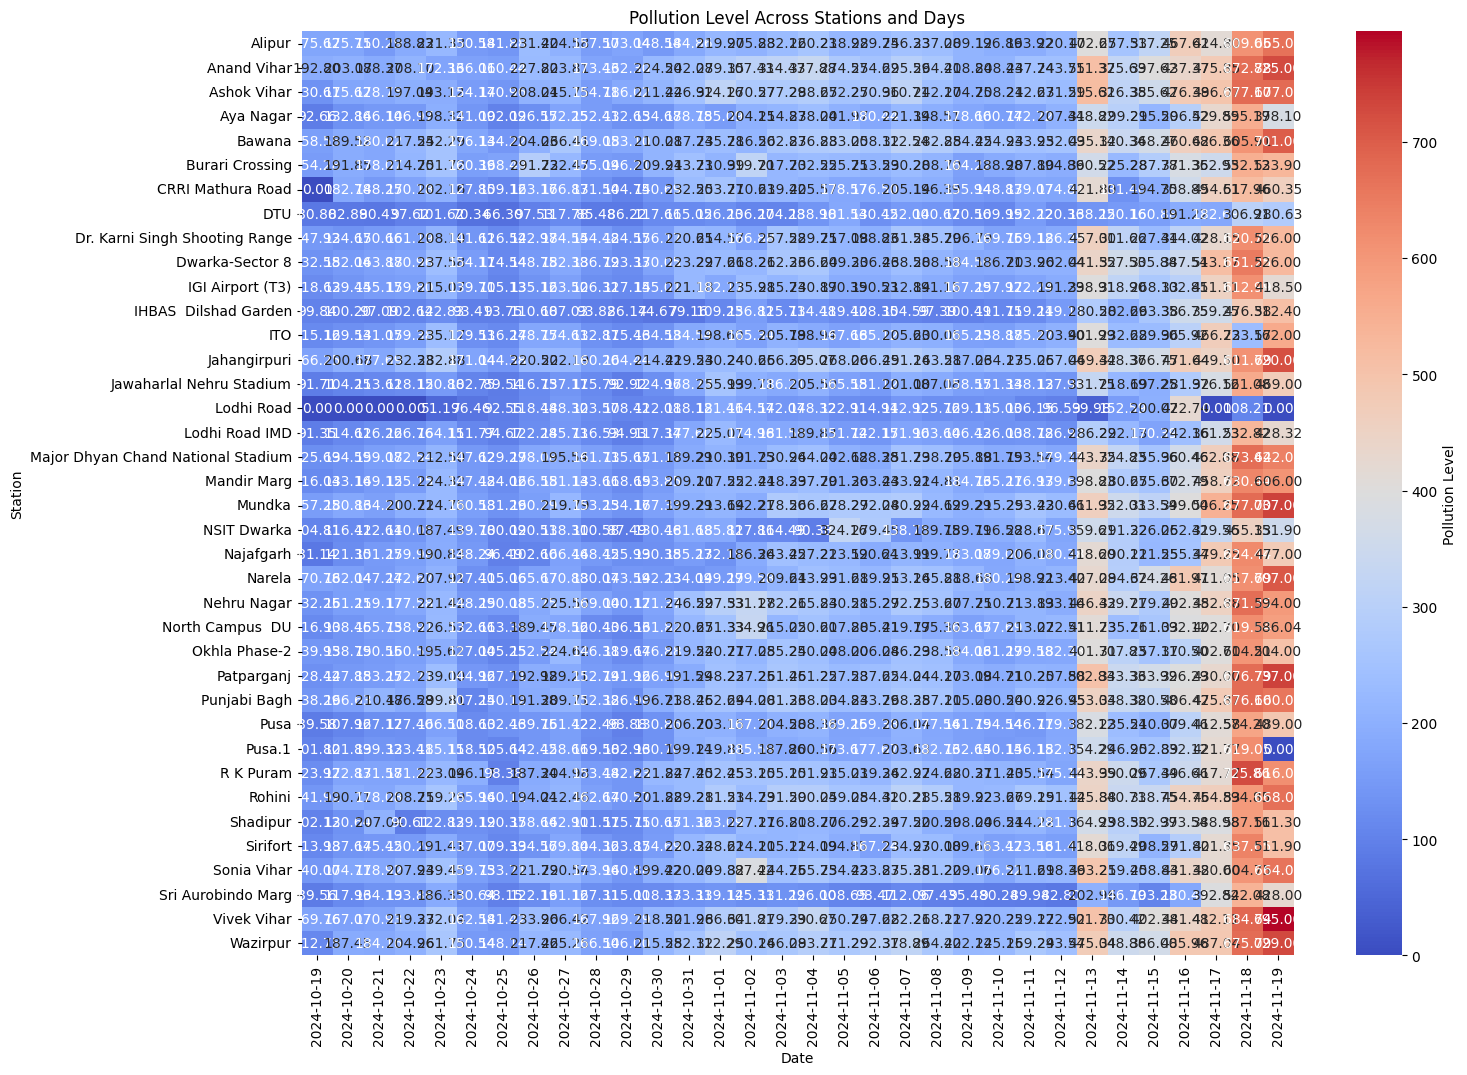

In [22]:
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    heatmap_data,  # Data to be visualized
    cmap='coolwarm',  # Color map for heatmap
    annot=True,  # Show values in the heatmap cells
    fmt='.2f',  # Format for the values inside the cells
    cbar_kws={'label': 'Pollution Level'},  # Label for the color bar
    xticklabels=heatmap_data.columns.strftime('%Y-%m-%d'),  # Format the dates as strings
    yticklabels=heatmap_data.index,  # Show the station names as row labels
)

plt.title('Pollution Level Across Stations and Days')
plt.xlabel('Date')
plt.ylabel('Station')
plt.xticks(rotation=90)  # Rotate date labels for better readability
plt.show()

From the heatmap, one can observe that the stations have very high air pollution by the 18th-19th of November 2024.